In [1]:
#importing required libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

<Figure size 432x288 with 0 Axes>

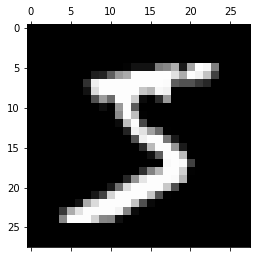

In [4]:
plt.gray()
plt.matshow(X_train[0])

In [13]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(y[index])

In [5]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [6]:
X_train = X_train/255
X_test = X_test/255

In [7]:
cnn = models.Sequential([
        #cnn
        layers.Conv2D(filters=28, kernel_size=(3,3), activation='relu', input_shape=(28,28, 1)),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(filters=56, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),

        layers.Flatten(),
        layers.Dense(56, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])


In [8]:
cnn.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.1500 - accuracy: 0.9538
Epoch 2/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0479 - accuracy: 0.9856
Epoch 3/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0332 - accuracy: 0.9893
Epoch 4/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0255 - accuracy: 0.9919
Epoch 5/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0201 - accuracy: 0.9937


In [9]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0360 - accuracy: 0.9877


[0.0360247939825058, 0.9876999855041504]

In [10]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[2.00452788e-09, 7.22269633e-10, 5.48720980e-09, 1.36820845e-05,
        5.30062834e-11, 1.49027457e-10, 3.91601675e-16, 9.99986172e-01,
        5.17208285e-08, 5.94784382e-08],
       [4.17780655e-08, 3.13902113e-08, 9.99999881e-01, 8.59877967e-12,
        3.11860843e-10, 7.91125001e-17, 9.71357892e-08, 6.99311026e-11,
        1.23507204e-09, 3.15674326e-13],
       [3.53368854e-08, 9.99847412e-01, 1.60538889e-07, 1.02381170e-08,
        1.01481710e-04, 2.47664190e-07, 2.80158438e-05, 1.57742197e-05,
        6.43974272e-06, 4.84340035e-07],
       [9.99998450e-01, 2.09755564e-11, 2.99375586e-07, 8.33602076e-09,
        3.97358341e-10, 1.15232590e-09, 1.08682093e-06, 2.35530906e-09,
        4.59523868e-08, 8.57377813e-08],
       [2.12371859e-07, 4.47105286e-09, 1.20317012e-09, 3.21491472e-10,
        9.99963045e-01, 3.63032560e-09, 1.70123418e-08, 2.89794684e-07,
        2.52240653e-07, 3.61253296e-05]], dtype=float32)

In [11]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[7, 2, 1, 0, 4]

In [12]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

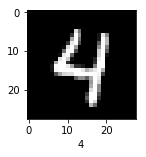

In [20]:
plot_sample(X_test, y_test,27)

In [21]:
y_classes[27]

4